In [1]:
import numpy as np
import pylab as plt
from math import log10
from pymc import Uniform, MCMC, deterministic

from scipy.interpolate import interp1d as interp
from scipy.optimize import brentq, minimize_scalar
from profiles import build_profile, build_kernel
from dispersion import SphericalJeansDispersion
from likelihood import GaussianLikelihood
#from fitter import *

%matplotlib inline

In [2]:
directory = '/home/andrea/Desktop/work/DWARF/dsphsim/'
rh = 0.04
D = 39.81
theta = 2*rh/D

In [4]:
dm = build_profile('NFW')
st = build_profile('plummer',**{'rh':rh}) # Plummer Stellar profile
kr = build_kernel('iso') # isotropic kernel
dwarf_props = {'D':D, 'theta':theta, 'rt':np.inf, 'with_errs':False}
Sigma = SphericalJeansDispersion(dm, st, kr, dwarf_props)

In [5]:
R, v = np.loadtxt(directory+'Ret2_data/dsph_001.txt',usecols=(5, 7),unpack=True)
vnan = np.isnan(v)
v = v[~vnan]
R = R[~vnan]
dv = np.zeros_like(v)

In [6]:
LL = GaussianLikelihood([R, v, dv, 0.], Sigma)

In [7]:
LL.set_free('dm_a')
LL.set_free('dm_b')
LL.set_free('dm_c')
LL.set_free('dm_r0')

$r_s = 0.35 , \rho_s = 7.55 \times 10^7 , J = 16.72$

In [8]:
J_array = np.linspace(15,18,20)
L_arr = np.empty_like(J_array)
a_arr = np.empty_like(J_array)
b_arr = np.empty_like(J_array)
c_arr = np.empty_like(J_array)
r_arr = np.empty_like(J_array)

In [9]:
LL.free_pars.keys()

['dm_a', 'dm_b', 'J', 'dm_r0', 'dm_c']

In [10]:
def model(J):
    a = Uniform('a', lower=0, upper=5)
    b = Uniform('b', lower=0, upper=5)
    c = Uniform('c', lower=0, upper=5)
    r = Uniform('r', lower=0, upper=5)
    
    @deterministic
    def loglike(J=J, a=a, b=b, c=c, r=r):
        return LL(a, b, J, r, c)
    
    return locals()

In [11]:
for J in J_array:
    M = MCMC(model(J))
    M.sample(1000)
    
    L_sample = M.trace('loglike')[:]
    true_indx = ~np.isnan(L_sample)
    L_sample = L_sample[true_indx]
    min_indx = np.where( L_sample==L_sample.min() )[0][0]
    L_arr = np.append(L_arr,L_sample[min_indx])
    print '\n %2.2f %5.2f '%(J, L_arr[-1])
    
    for par in ['a', 'b', 'c', 'r']:
        exec( "{p}_sample = M.trace('{p}')[:]".format(p=par) )
        exec( "{p}_sample = {p}_sample[true_indx]".format(p=par) )
        exec( "{p}_arr = np.append({p}_arr,{p}_sample[min_indx])".format(p=par) )
        exec( "print '{p}' , {p}_arr[-1]".format(p=par) )

/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:295: UserWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg)
/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:295: UserWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg)


 [--                6%                  ] 60 of 1000 complete in 257.8 sec

/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:295: UserWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/pymc/database/base.py:282: UserWarning: 
Error tallying loglike, will not try to tally it again this chain.
Did you make all the samevariables and step methods tallyable
as were tallyable last time you used the database file?

Error:

Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/pymc/database/base.py", line 272, in tally
    self._traces[name].tally(chain)
  File "/usr/local/lib/python2.7/dist-packages/pymc/database/ram.py", line 94, in tally
    value = self._getfunc()
  File "/usr/local/lib/python2.7/dist-packages/pymc/PyMCObjects.py", line 468, in get_value
    _value = self._value.get()
  File "LazyFunction.pyx", line 280, in pymc.LazyFunction.LazyFunction.get (pymc/LazyFunction.c:2568)
  File "<ipython-input-10-272dde50bcf3

 [-----------------100%-----------------] 1000 of 1000 complete in 259.8 sec
 15.00  0.00 
a 4.31804532167
b 1.94009898223
c 2.42199681283
r 3.85350408412
 [-----------------100%-----------------] 1000 of 1000 complete in 0.2 sec
 15.16  0.00 
a 0.919416414447
b 2.59217041717
c 0.310398166101
r 1.24677489561


/usr/local/lib/python2.7/dist-packages/pymc/database/base.py:282: UserWarning: 
Error tallying loglike, will not try to tally it again this chain.
Did you make all the samevariables and step methods tallyable
as were tallyable last time you used the database file?

Error:

Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/pymc/database/base.py", line 272, in tally
    self._traces[name].tally(chain)
  File "/usr/local/lib/python2.7/dist-packages/pymc/database/ram.py", line 94, in tally
    value = self._getfunc()
  File "/usr/local/lib/python2.7/dist-packages/pymc/PyMCObjects.py", line 468, in get_value
    _value = self._value.get()
  File "LazyFunction.pyx", line 280, in pymc.LazyFunction.LazyFunction.get (pymc/LazyFunction.c:2568)
  File "<ipython-input-10-272dde50bcf3>", line 9, in loglike
    return LL(a, b, J, r, c)
  File "likelihood.py", line 44, in __call__
    S = self.compute()
  File "likelihood.py", line 61, in compute
    S = dv**2 + self.s

KeyboardInterrupt: 

In [16]:
interp_L = interp(J_array, L_arr-L_arr.min())
interp_r = interp(J_array, r_arr)
interp_a = interp(J_array, a_arr)
interp_b = interp(J_array, b_arr)
interp_c = interp(J_array, c_arr)

In [17]:
eval_Like_J = np.linspace(J_array.min(), J_array.max(), 1e3)
min_Like_J = interp_L(eval_Like_J).min()
Jmin = eval_Like_J[ np.where( interp_L(eval_Like_J) == min_Like_J )[0][0] ]
J_plt = np.linspace(J_array.min(),J_array.max())

In [18]:
Jr = float(interp_r(Jmin))
Ja = float(interp_a(Jmin))
Jb = float(interp_b(Jmin))
Jc = float(interp_c(Jmin))

In [53]:
dm.r0 = Jr
dm.a = Ja
dm.b = Jb
dm.c = Jc
minrho = lambda rho : float(abs(Jmin - log10( dm.Jfactor(**dwarf_props) ) - 2*rho))
Jrho = 10**minimize_scalar(minrho).x

In [54]:
print 'J = %2.2f, r = %2.2f, rho = %2.2e, a = %2.2f, b = %2.2f , c = %2.2f'%(Jmin, Jr, Jrho, Ja, Jb ,Jc)

J = 16.00, r = 0.11, rho = 2.12e+08, a = 4.03, b = 2.77 , c = 0.83


In [23]:
for i,c in enumerate([0.5,2.0,4.5]):
    exec('J%ssL = %.2f'%(i+1, brentq(lambda j : interp_L(j)-c, J_array.min(), Jmin) - Jmin))
    exec('J%ssR = %.2f'%(i+1, brentq(lambda j : interp_L(j)-c, Jmin, J_array.max()) - Jmin))

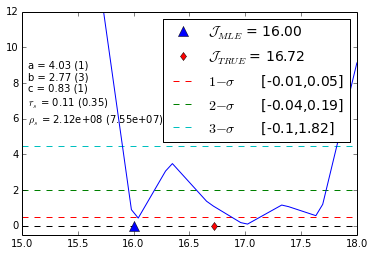

In [60]:
plt.plot(J_plt, interp_L(J_plt))
plt.hlines(0, J_plt.min(), J_plt.max(), linestyles='dashed')
plt.plot(Jmin, 0, 'b^', markersize=10, label=r'$\mathcal{J}_{MLE}$ = %.2f'%Jmin)
plt.plot(16.72, 0, 'rd', markersize=6, label=r'$\mathcal{J}_{TRUE}$ = 16.72')
for i,(c,h) in enumerate(zip(['r','g','c'],[0.5,2.0,4.5])):
    JL, JR = eval('J%ssL'%str(i+1)), eval('J%ssR'%str(i+1))
    plt.hlines(h, J_plt.min(), J_plt.max(), linestyles='dashed', colors=c,
              label=r'$%i-\sigma$'%(i+1)+'\t'+'[%2s,%2s]'%(str(JL),str(JR)))
plt.legend(numpoints=1,fontsize=14).get_frame().set_facecolor('w')
plt.text(15.05, 5,'a = %.2f (1)'%Ja +'\n'+
                 'b = %.2f (3)'%Jb +'\n'+
                 'c = %.2f (1)'%Jc +'\n'+
                 r'$r_s$ = %.2f (0.35)'%Jr +'\n'+
                 r'$\rho_s$ = %.2e (7.55e+07)'%Jrho +'\n')

plt.ylim(-0.5,12);
#plt.savefig('results/LikeJ_10p_Mcmc.png',format='png',dpi=300);